# Part II - Loan Data from Prosper
## by Kelton Cumbe

## Investigation Overview

This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others. In this project we will be exploring a dataset known as the Prosper Loan Dataset. The Prosper Loan Dataset is a dataset that contains data of the loan platform known as '<a href="https://www.prosper.com/">Prosper</a>'. 


## Dataset Overview

The present dataset are composed of 81 columns variables, and 113937 row records of loans data. Here we can find a table mostly composed of following data structure, such as float and int datatypes, in resume, we can find: 3 booleans, 11 int, 17 objects and 50 float.

Due to the exploration task, these datasets were further divided into a smaller dataframe called `acquired_values` containing just the variables of interest for our analysis. The `acquired_values` consists of 11 variables of which 7 are float, 1 is an int and 3 are of object type.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
main_df = pd.read_csv('prosperLoanData.csv')

In [3]:
# load in the dataset into a pandas dataframe
duplicated_df = main_df.copy()

In [4]:
#Updating the name of ListingCategory (numeric) into ListingCategory 
duplicated_df.rename(columns = {'ListingCategory (numeric)' : 'ListingCategory'}, inplace = True)

In [5]:
#Updating the datatype from Int to string of the column indicated above
duplicated_df['ListingCategory'] = duplicated_df['ListingCategory'].astype('str')

In [6]:
#Updating the ListingCategories values to their actual correct categories.

duplicated_df.loc[duplicated_df['ListingCategory'] == '0', ['ListingCategory']] = "Not Available"
duplicated_df.loc[duplicated_df['ListingCategory'] == '1', ['ListingCategory']] = "Debt Consolidation"
duplicated_df.loc[duplicated_df['ListingCategory'] == '2', ['ListingCategory']] = "Home Improvement"
duplicated_df.loc[duplicated_df['ListingCategory'] == '3', ['ListingCategory']] = "Business"
duplicated_df.loc[duplicated_df['ListingCategory'] == '4', ['ListingCategory']] = "Personal Loan"
duplicated_df.loc[duplicated_df['ListingCategory'] == '5', ['ListingCategory']] = "Student Use"
duplicated_df.loc[duplicated_df['ListingCategory'] == '6', ['ListingCategory']] = "Auto"
duplicated_df.loc[duplicated_df['ListingCategory'] == '7', ['ListingCategory']] = "Other"
duplicated_df.loc[duplicated_df['ListingCategory'] == '8', ['ListingCategory']] = "Baby&Adoption"
duplicated_df.loc[duplicated_df['ListingCategory'] == '9', ['ListingCategory']] = "Boat"
duplicated_df.loc[duplicated_df['ListingCategory'] == '10', ['ListingCategory']] = "Cosmetic Procedure"
duplicated_df.loc[duplicated_df['ListingCategory'] == '11', ['ListingCategory']] = "Engagement Ring"
duplicated_df.loc[duplicated_df['ListingCategory'] == '12', ['ListingCategory']] = "Green Loans"
duplicated_df.loc[duplicated_df['ListingCategory'] == '13', ['ListingCategory']] = "Household Expenses"
duplicated_df.loc[duplicated_df['ListingCategory'] == '14', ['ListingCategory']] = "Large Purchases"
duplicated_df.loc[duplicated_df['ListingCategory'] == '15', ['ListingCategory']] = "Medical/Dental"
duplicated_df.loc[duplicated_df['ListingCategory'] == '16', ['ListingCategory']] = "Motorcycle"
duplicated_df.loc[duplicated_df['ListingCategory'] == '17', ['ListingCategory']] = "RV"
duplicated_df.loc[duplicated_df['ListingCategory'] == '18', ['ListingCategory']] = "Raxes"
duplicated_df.loc[duplicated_df['ListingCategory'] == '19', ['ListingCategory']] = "Vacation"
duplicated_df.loc[duplicated_df['ListingCategory'] == '20', ['ListingCategory']] = "Wedding Loans"

In [7]:
#Unordinated ArrayList of variables of interest or acquired collection list
acquired = ['BorrowerAPR', 'BorrowerRate', 'ListingCategory', 'EmploymentStatus', 'CurrentCreditLines',
           'OpenRevolvingAccounts','LoanStatus', 'OpenRevolvingMonthlyPayment', 'TotalProsperLoans', 'ProsperPrincipalBorrowed', 
            'LP_InterestandFees']

In [8]:
#Getting Separated Dataframe
acquired_values = duplicated_df[acquired]

## Comparsion Relation between Borrower's Rate & Borrower's APR in Resume

We can assume, according to the information below, that the data visualized is positively correlated, for each LoanStatus category. This is because the borrower's APR increases as the borrower's rate increases.

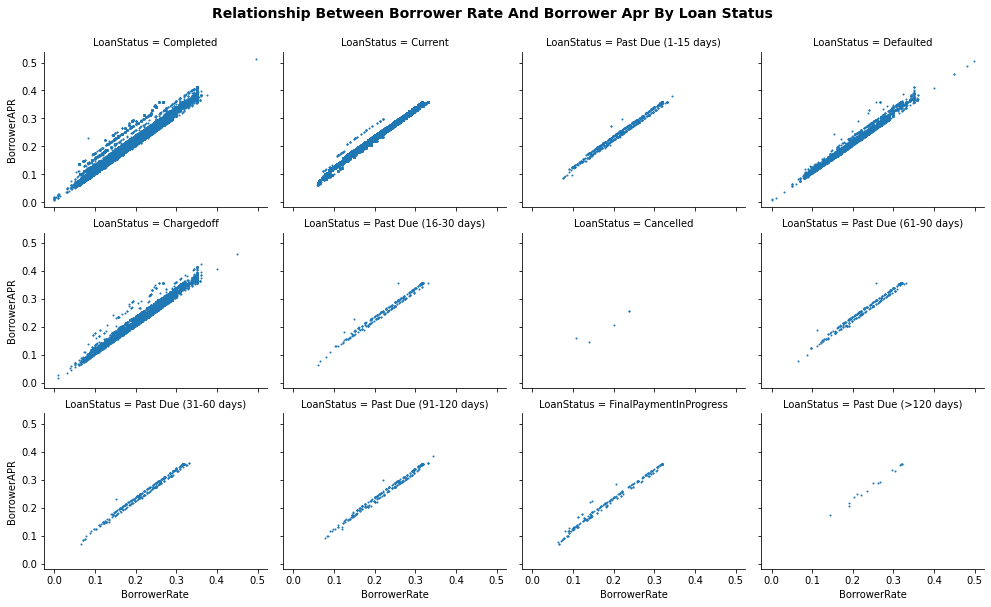

In [9]:
g = sb.FacetGrid(data = acquired_values, col = 'LoanStatus', col_wrap = 4);
g.map(plt.scatter, 'BorrowerRate', 'BorrowerAPR',s=1 );

g.fig.set_size_inches(14,8);

plt.suptitle("Relationship between borrower rate and borrower apr by Loan status".title(), y = 1.04, fontsize = 14, weight = "bold");

## Preview Loan Status in Percentage

In this second presentation, it is possible to see, through a horizontal bar graph, the preview of the status of the loans and at the end of each bar we have the numerical presentation of its percentage. It is also possible to see that most of the loans made are still on time. The remaining half is dominated by completed status, chargedoff and Defaulted  with 33.417%, 10.525% and 4.404%, respectively. The remaining categories such as: Past Due, FinalPaymentInProgress and Cancelled have the lowest count with their cumulative percentage not up to 3.0%.


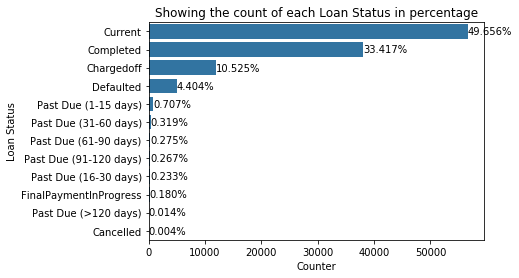

In [10]:
#Showing the percentage of loan status beside each bar
value = acquired_values.shape[0]
chart_color = sb.color_palette()[0]
order = acquired_values['LoanStatus'].value_counts().index
counts = acquired_values['LoanStatus'].value_counts()

sb.countplot(data = acquired_values, y = 'LoanStatus', color = chart_color, order = order);
plt.title('Showing the count of each Loan Status in percentage');
plt.xlabel('Counter');
plt.ylabel('Loan Status');

for i in range(counts.shape[0]):
    Count = counts[i]
    percentage = '{:0.3f}%'.format(100*Count/value)
    plt.text(Count+1, i, percentage, va = 'center');

## Preview Distribution of Borrower's Rate

In this third presentation, we see that the Borrower Rate is seen to be unimodal and slightly skewed to the right. When the bins were adjusted, we discovered some high peaks on the right side of our distribution.

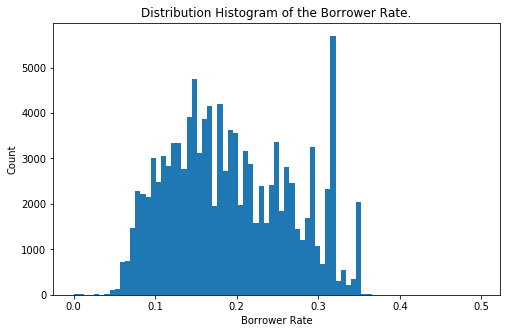

In [11]:
#Adjust binsize
binsize = 0.00630
bins = np.arange(0, acquired_values['BorrowerRate'].max()+binsize, binsize)

plt.figure(figsize = [8, 5]);
plt.hist(acquired_values.BorrowerRate, bins = bins);
plt.title('Distribution Histogram of the Borrower Rate.');
plt.xlabel('Borrower Rate');
plt.ylabel('Count');

## Comparsion Between Loan Status & Borrower's Rate

Now we have our fourth presentation, where we have a violin plot, showing a lower median of values below 20% borrower rate for Completed, Current and FinalPaymentInProgress Statuses, and for the rest of the categories it has a higher median which is approximately 25%. And it can be concluded from this that the positive results of the LoanStatus for Completed, FinalPaymentInProgress, for example, are characterized with a lower rate of the borrower, while we have negative results for example for the Defaulted, Past Due, which are characterized with a higher rate of the borrower.

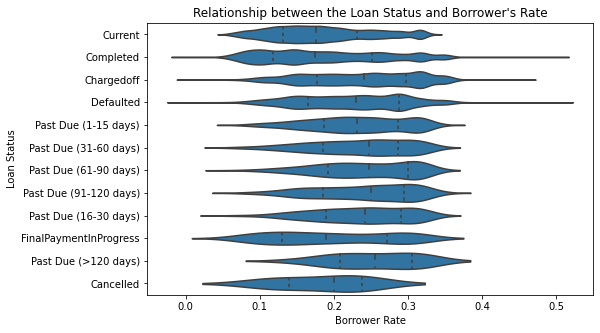

In [12]:
plt.figure(figsize = [8,5])
chart_color = sb.color_palette()[0]
order = acquired_values['LoanStatus'].value_counts().index

sb.violinplot(data = acquired_values, y = 'LoanStatus', x = 'BorrowerRate', color= chart_color, inner = 'quartiles' , order = order);
plt.title('Relationship between the Loan Status and Borrower\'s Rate');
plt.ylabel('Loan Status');
plt.xlabel('Borrower Rate');

## Corrolation Between Borrower's Rate & Borrower's APR

We have reached the end of our presentation... And in this part, we have illustrated below, the scatter plot between the BorrowerRate and BorrowerAPR, where it shows the positive correlation between the variables I mentioned. And with that we can conclude that, as the BorrowerRate increases the BorrowerAPR increases as well.

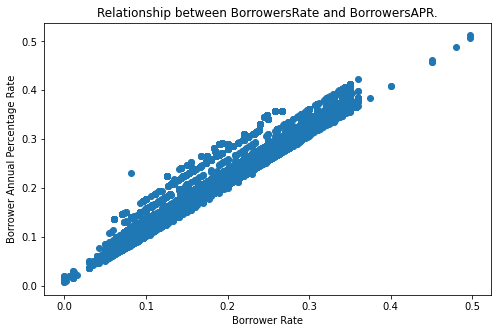

In [13]:
plt.figure(figsize = [8,5]);
plt.scatter(data = acquired_values, x = 'BorrowerRate', y = 'BorrowerAPR');
plt.xlabel('Borrower Rate');
plt.ylabel('Borrower Annual Percentage Rate');
plt.title('Relationship between BorrowersRate and BorrowersAPR.');

### Generate Slideshow
Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show.  

In [ ]:
# Use this command if you are running this file in local
!jupyter nbconvert Part_II_slide_deck_template.ipynb --to slides --post serve --no-input --no-prompt